<a href="https://colab.research.google.com/github/rzeller/sandbox/blob/main/create_shipping_fee_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import tensorflow as tf


In [11]:



def create_dataframe(mnist_x, mnist_y):
  df = pd.DataFrame({'mnist_label': mnist_y})
  df['image'] = [mnist_x[i,:,:] for i in range(mnist_x.shape[0])]
  return df
  
def add_features(df_in, min_weight, min_fee, rate):
  df = df_in.copy()
  df['weight'] = df['mnist_label'] + np.random.random(len(df)) - 0.5
  
  # add pickup, dropoff, and distance
  df[['pickup_x', 'pickup_y']] = generate_random_points(len(df))
  df[['dropoff_x', 'dropoff_y']] = generate_random_points(len(df))
  df['distance'] = np.sqrt((df['dropoff_x'] - df['pickup_x'])**2 + (df['dropoff_y'] - df['pickup_y'])**2)
  
  # compute shipping fee
  df['shipping_fee'] = np.maximum(np.maximum(df['weight'], min_weight) * df['distance'] * rate, min_fee)
  return df

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

df_train = create_dataframe(x_train, y_train)
df_test = create_dataframe(x_test, y_test)

df_train['train_test'] = 'train'
df_test['train_test'] = 'test'

df = pd.concat((df_train, df_test))



11501568/11490434 [==============================] - 0s 0us/step


NameError: ignored

#Load mnist data and create dataframe
We will store the mnist images and labels in a dataframe.

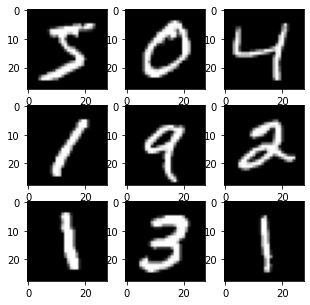

In [19]:
def create_dataframe(mnist_x, mnist_y):
  df = pd.DataFrame({'mnist_label': mnist_y})
  df['image'] = [mnist_x[i,:,:] for i in range(mnist_x.shape[0])]
  return df

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
df = create_dataframe(x_train, y_train)

plt.figure(figsize=(5, 5))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(df['image'].iloc[i], cmap='gray')
plt.show()

# Generate points with random coordinates

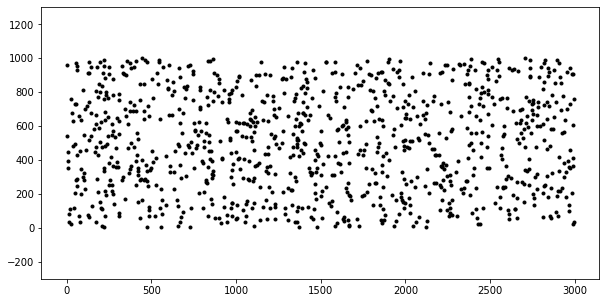

In [10]:
def generate_random_points(n, x_max=3000, y_max=1000):
  x_loc = np.random.random(n) * x_max
  y_loc = np.random.random(n) * y_max
  return np.array([x_loc, y_loc]).T


x_loc, y_loc = (generate_random_points(1000)[:,i] for i in [0, 1])
plt.figure(figsize=(10,5))
plt.axis('equal')
plt.plot(x_loc, y_loc, '.k')
plt.show()

#Add features

In [24]:
def add_features(df_in, min_weight, min_fee, rate):
  df = df_in.copy()
  df['weight'] = df['mnist_label'] + np.random.random(len(df)) - 0.5
  
  # add pickup, dropoff, and distance
  df[['pickup_x', 'pickup_y']] = generate_random_points(len(df))
  df[['dropoff_x', 'dropoff_y']] = generate_random_points(len(df))
  df['distance'] = np.sqrt((df['dropoff_x'] - df['pickup_x'])**2 + (df['dropoff_y'] - df['pickup_y'])**2)
  
  # compute shipping fee
  df['shipping_fee'] = np.maximum(np.maximum(df['weight'], min_weight) * df['distance'] * rate, min_fee)
  return df

min_weight = 2.
min_fee = 3.
rate = 0.001

df = add_features(df, min_weight, min_fee, rate)
df.head()


,mnist_label,image,weight,pickup_x,pickup_y,dropoff_x,dropoff_y,distance,shipping_fee
0,5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5.049255,43.083538,937.571039,184.401290,437.037939,520.100078,3.000000
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",-0.137809,2843.107788,526.260732,733.002089,156.834520,2142.200221,4.284400
2,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3.716895,19.340057,711.488269,2903.071967,865.705973,2887.852633,10.733845
3,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.744202,886.359230,916.433251,1201.834867,316.240291,678.053440,3.000000
4,9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8.512332,1802.812241,374.894017,977.856096,581.637981,850.467934,7.239465


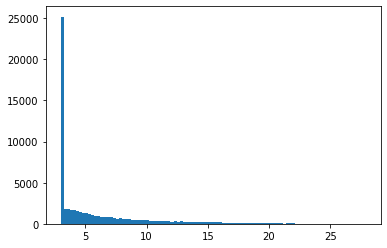

In [25]:
plt.hist(df['shipping_fee'], bins=100)
plt.show()

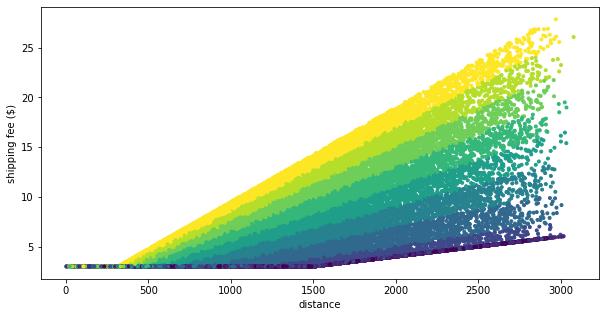

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(df['distance'], df['shipping_fee'], c=df['mnist_label'], marker='.')
plt.xlabel('distance')
plt.ylabel('shipping fee ($)')
plt.show()

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/code/sandbox/data/shipping_fee_data_20211213.csv', mode='w') as f:
  df.to_csv(f)